In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime as dt 
import calendar as cld 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates

In [2]:
#path="C:/Users/Lenovo/Desktop/TC_brief/COSIPY_Data_nc/*.nc"

In [3]:
#path

In [4]:
#data=xr.open_mfdataset(path) #Opening multiple data files 

In [5]:
#data.variables

In [6]:
#extract_data=data[['U2','T2','RH2']] #Subsetting needed data variables 

In [7]:
#dates=extract_data.indexes['time'] # Extracting dates as from index


In [8]:
#As our data was multi- dimensional so we need to make it flatten 
#Creating the dataframe 
#extracted_df = pd.DataFrame({
#    "Date": dates,
#   "Wind": extract_data['U2'].values.flatten(),
#    "Temperature": extract_data['T2'].values.flatten(),
#    "Relative Humidity": extract_data['RH2'].values.flatten()
#})


In [9]:
#extracted_df["Temperature"]=extracted_df["Temperature"]-273.15
#extracted_df

In [10]:
#extracted_df.set_index(['Date'], inplace=True)

In [11]:
#extracted_df["Wind"].plot()

In [12]:
#extracted_daily_df=extracted_df.resample('D').mean()

In [13]:
#extracted_daily_df

In [15]:
complete_simulation=pd.read_csv("C:/Users/Lenovo/OneDrive - Tribhuvan University/Desktop/TC_brief/AWS_H_extrapolated_from_naulek_2019_2022.csv")
complete_simulation.rename(columns={'T2':'Temperature','Unnamed: 0':'Date','U2':'Wind','RH2':'Relative Humidity'}, inplace=True )


In [16]:
complete_simulation.set_index(complete_simulation['Date'],drop=True, inplace=True)

In [17]:
complete_simulation_selected=complete_simulation[['Temperature','Wind','Relative Humidity']]

In [18]:
complete_simulation_selected["Temperature"]=complete_simulation_selected["Temperature"]-273.15

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16904\2630714898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_simulation_selected["Temperature"]=complete_simulation_selected["Temperature"]-273.15


In [19]:
complete_simulation_selected.index=pd.to_datetime(complete_simulation_selected.index)

In [20]:
complete_simulation_selected_daily=complete_simulation_selected.resample('D').mean()

In [21]:
complete_simulation_selected_daily

,Temperature,Wind,Relative Humidity
Date,,,
2019-11-01,-9.675752,1.777313,33.466875
2019-11-02,-10.071294,1.493854,46.295000
2019-11-03,-9.885418,2.512979,54.915834
2019-11-04,-11.050462,1.743167,62.048751
2019-11-05,-10.421793,1.811937,54.539376
...,...,...,...
2022-11-06,-10.031254,3.277146,20.337708
2022-11-07,-8.177356,3.219792,13.646875
2022-11-08,-8.325538,3.593417,11.696667


In [23]:
observation_df=pd.read_csv("C:/Users/Lenovo/OneDrive - Tribhuvan University/Desktop/TC_brief/daily_data.csv",index_col="Date")
observation_df.head()

,SWE_cum,prep_cum,Tair,pressure,Precipitation,RH,wind,Direction,SWin,SWout,LWin,LWout
Date,,,,,,,,,,,,
2019-11-13,23.790116,0.0,-5.160318,533.936800,0.0,20.403182,2.627273,192.354386,267.610209,164.389025,167.086364,215.302093
2019-11-14,21.639506,0.0,-6.486750,534.112939,0.0,14.730625,2.733938,238.164417,240.433565,148.336013,159.437292,220.224167
2019-11-15,22.268263,0.0,-6.712000,532.787939,0.0,23.286875,3.143771,233.030417,244.414667,149.141354,163.107917,219.846667
2019-11-16,22.598098,0.0,-6.989979,531.998355,0.0,35.799583,4.093813,198.149375,227.841750,142.004625,174.046250,233.689375
2019-11-17,20.160161,0.0,-7.865229,530.279605,0.0,24.822292,3.805771,224.918667,243.920813,147.141479,149.791875,208.569583


In [24]:
observation_df.drop(["pressure","Precipitation","Direction","SWin","SWout ","LWin","LWout"],inplace=True, axis=1)


In [25]:
observation_df=observation_df.add_suffix("_observation")

In [26]:
observation_df.index=pd.to_datetime(observation_df.index)


In [27]:
observation_df.index

DatetimeIndex(['2019-11-13', '2019-11-14', '2019-11-15', '2019-11-16',
               '2019-11-17', '2019-11-18', '2019-11-19', '2019-11-20',
               '2019-11-21', '2019-11-22',
               ...
               '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18'],
              dtype='datetime64[ns]', name='Date', length=737, freq=None)

In [28]:
complete_df=observation_df.merge(complete_simulation_selected_daily,how='left', on='Date')
complete_df

,SWE_cum_observation,prep_cum_observation,Tair_observation,RH_observation,wind_observation,Temperature,Wind,Relative Humidity
Date,,,,,,,,
2019-11-13,23.790116,0.00000,-5.160318,20.403182,2.627273,-6.503064,2.454375,17.391875
2019-11-14,21.639506,0.00000,-6.486750,14.730625,2.733938,-7.719063,2.163292,15.391458
2019-11-15,22.268263,0.00000,-6.712000,23.286875,3.143771,-7.457690,2.382354,18.668125
2019-11-16,22.598098,0.00000,-6.989979,35.799583,4.093813,-6.877338,3.672875,27.360208
2019-11-17,20.160161,0.00000,-7.865229,24.822292,3.805771,-7.758022,3.298937,18.132917
...,...,...,...,...,...,...,...,...
2021-11-14,NaN,2157.73199,NaN,NaN,NaN,-5.529481,3.887264,2.820625
2021-11-15,NaN,2157.73199,-7.552333,12.356667,5.416185,-7.413585,4.875375,4.935208
2021-11-16,NaN,2157.73199,-7.224833,10.749167,5.351979,-6.574647,4.403188,4.528542


In [29]:
complete_df["year"]=complete_df.index.year
complete_df["month"]=complete_df.index.month

In [30]:
season={1:'winter',2:'winter',3:'pre-monsoon',4:'pre-monsoon',5:'pre-monsoon', 6:'monsoon',7:'monsoon',8:'monsoon',9:'monsoon',10:'post-monsoon',11:'post-monsoon',12:'winter'}

In [31]:
complete_df["season"]=complete_df["month"].apply(lambda x:season[x])

In [32]:
complete_df.tail()

,SWE_cum_observation,prep_cum_observation,Tair_observation,RH_observation,wind_observation,Temperature,Wind,Relative Humidity,year,month,season
Date,,,,,,,,,,,
2021-11-14,NaN,2157.73199,NaN,NaN,NaN,-5.529481,3.887264,2.820625,2021,11,post-monsoon
2021-11-15,NaN,2157.73199,-7.552333,12.356667,5.416185,-7.413585,4.875375,4.935208,2021,11,post-monsoon
2021-11-16,NaN,2157.73199,-7.224833,10.749167,5.351979,-6.574647,4.403188,4.528542,2021,11,post-monsoon
2021-11-17,NaN,2157.73199,-4.629917,11.981646,3.633479,-5.321646,2.418375,10.908542,2021,11,post-monsoon
2021-11-18,NaN,2157.73199,-4.624808,14.510769,6.157154,-3.915542,5.196125,17.634167,2021,11,post-monsoon


In [33]:
data={'Date':["2019-11-13","2020-11-24","2021-11-18"],'SWE':[20,533,1357]}
observation_point_df=pd.DataFrame(data)


In [34]:
observation_point_df['Date']=pd.to_datetime(observation_point_df['Date'])

In [35]:
observation_point_df.set_index(['Date'],inplace=True)

In [36]:
observation_point_df

,SWE
Date,
2019-11-13,20
2020-11-24,533
2021-11-18,1357


In [37]:
swe_values = observation_point_df['SWE'].values
swe_index = observation_point_df.index.to_numpy()
yerr = np.full_like(swe_values, 40)  # Create an array of the same length with all values set to 40


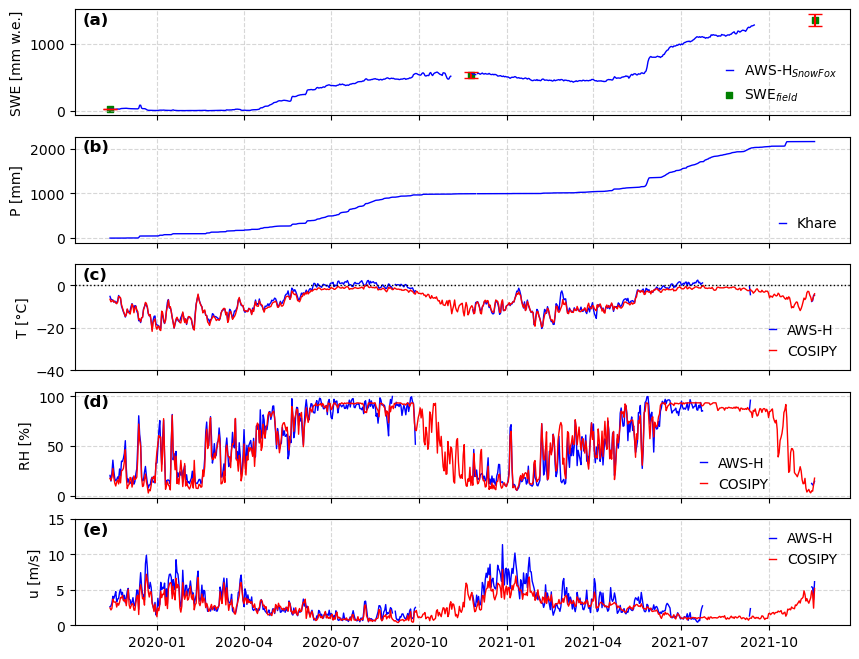

In [43]:
from matplotlib.ticker import MaxNLocator, AutoMinorLocator, MultipleLocator
import string

# List of y-labels
y_labels = ['[mm w.e.]', '[mm]', '[\u00b0C]', '[%]', '[m/s]']
# List of labels
labels = ['Khare', 'Precipitation$_{Khare}$', 'Temperature$_{AWS-H}$', 'Humidity$_{AWS-H}$', 'Wind Speed$_{AWS-H}$']


yerr = np.array([0,49,88] )


fig,ax=plt.subplots(nrows=5,ncols=1,sharex=True,figsize=(10,8))

ax[0].plot(complete_df["SWE_cum_observation"], linewidth=1,linestyle="-",color="blue",label="AWS-H$_{SnowFox}$")
ax[0].scatter(observation_point_df.index,observation_point_df['SWE'], color='green', marker=',',s=15, label="SWE$_{field}$")
ax[0].errorbar(swe_index, swe_values, yerr=yerr, fmt=" ", color='red',capsize=5)   # Add the error bars

ax[0].legend(loc=4, frameon=False, handlelength=0.5)
ax[0].set_ylabel('SWE [mm w.e.]')
ax[0].grid(alpha=0.5,linestyle='--')
ax[0].text(0.01, 0.86, f"({string.ascii_lowercase[0]})", transform=ax[0].transAxes, fontsize=12, fontweight='bold')

ax[1].plot(complete_df["prep_cum_observation"], linewidth=1,linestyle="-",color="blue",label="Khare")
ax[1].legend(loc=4, frameon=False, handlelength=0.5)
ax[1].set_ylabel('P [mm]')
ax[1].grid(alpha=0.5,linestyle='--')
ax[1].text(0.01, 0.86, f"({string.ascii_lowercase[1]})", transform=ax[1].transAxes, fontsize=12, fontweight='bold')

ax[2].plot(complete_df["Tair_observation"], linewidth=1,linestyle="-",color="blue",label="AWS-H")
ax[2].plot(complete_df["Temperature"], linewidth=1,linestyle="-",color="red",label="COSIPY")
ax[2].axhline(0, color='black', linewidth=1, linestyle='dotted')
ax[2].legend(loc='best', frameon=False, handlelength=0.5)
ax[2].set_ylabel('T [\u00b0C]')
ax[2].set_ylim(-40,10)
ax[2].grid(alpha=0.5,linestyle='--')
ax[2].text(0.01, 0.86, f"({string.ascii_lowercase[2]})", transform=ax[2].transAxes, fontsize=12, fontweight='bold')

ax[3].plot(complete_df["RH_observation"], linewidth=1,linestyle="-",color="blue",label='AWS-H')
ax[3].plot(complete_df["Relative Humidity"], linewidth=1,linestyle="-",color="red",label="COSIPY")
ax[3].legend(loc=(0.8,0.01), frameon=False, handlelength=0.5)
ax[3].set_ylabel('RH [%]')
ax[3].grid(alpha=0.5,linestyle='--')
ax[3].text(0.01, 0.86, f"({string.ascii_lowercase[3]})", transform=ax[3].transAxes, fontsize=12, fontweight='bold')

ax[4].plot(complete_df["wind_observation"], linewidth=1,linestyle="-",color="blue",label='AWS-H')
ax[4].plot(complete_df["Wind"], linewidth=1,linestyle="-",color="red",label='COSIPY')
ax[4].legend(loc='best',frameon=False, handlelength=0.5)
ax[4].set_ylabel('u [m/s]')
ax[4].set_ylim(0,15)
ax[4].grid(alpha=0.5,linestyle='--')
ax[4].text(0.01, 0.86, f"({string.ascii_lowercase[4]})", transform=ax[4].transAxes, fontsize=12, fontweight='bold')

#fig.text(0.5, 0.04, 'Date', ha='center', va='center', fontsize=15)
plt.savefig(r'C:\\Users\\Lenovo\\OneDrive - Tribhuvan University\\Desktop\\TC_brief\\Figures\\time_series_high_updated.png', dpi=500, facecolor='w', bbox_inches="tight")
plt.show()  # Display the plot


In [ ]:
import matplotlib.patches as patches
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import string
import numpy as np

# Define the season colors
season_colors = {
    'monsoon': 'lightpink',
    'pre-monsoon': 'lightgreen',
    'post-monsoon': 'lightyellow',
    'winter': 'lightblue'
}

# Define the error array
yerr = np.array([0,49,88])

# Create the subplots
fig, ax = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(10, 8))

# Plot the data
for i in range(5):
    if i == 0:
        ax[i].plot(complete_df["SWE_cum_observation"], linewidth=1, linestyle="-", color="blue", label="AWS-H$_{SnowFox}$")
        ax[i].errorbar(swe_index, swe_values, yerr=yerr, fmt=" ", color='red', capsize=5)  # Add the error bars
        ax[i].set_ylabel('SWE [mm w.e.]')
        ax[i].legend(loc=4, frameon=False, handlelength=0.5)
    elif i == 1:
        ax[i].plot(complete_df["prep_cum_observation"], linewidth=1, linestyle="-", color="blue", label="Khare")
        ax[i].set_ylabel('P [mm]')
        ax[i].legend(loc=4, frameon=False, handlelength=0.5)
    elif i == 2:
        ax[i].plot(complete_df["Tair_observation"], linewidth=1, linestyle="-", color="blue", label="AWS-H")
        ax[i].plot(complete_df["Temperature"], linewidth=1, linestyle="-", color="red", label="COSIPY")
        ax[i].axhline(0, color='black', linewidth=1, linestyle='dotted')
        ax[i].set_ylabel('T [\u00b0C]')
        ax[i].set_ylim(-40, 10)
        ax[i].legend(loc='best', frameon=False, handlelength=0.5)
    elif i == 3:
        ax[i].plot(complete_df["RH_observation"], linewidth=1, linestyle="-", color="blue", label='AWS-H')
        ax[i].plot(complete_df["Relative Humidity"], linewidth=1, linestyle="-", color="red", label="COSIPY")
        ax[i].set_ylabel('RH [%]')
        ax[i].legend(loc=(0.8, 0.01), frameon=False, handlelength=0.5)
    elif i == 4:
        ax[i].plot(complete_df["wind_observation"], linewidth=1, linestyle="-", color="blue", label='AWS-H')
        ax[i].plot(complete_df["Wind"], linewidth=1, linestyle="-", color="red", label='COSIPY')
        ax[i].set_ylabel('u [m/s]')
        ax[i].set_ylim(0, 15)
        ax[i].legend(loc='best', frameon=False, handlelength=0.5)

# Add seasonal rectangles
for i, month in enumerate(complete_df.index):
    season = complete_df.loc[month, 'season']
    if season in season_colors:
        month_num = mdates.date2num(month)  # Convert the month to a number
        for j in range(5):  # Loop over all subplots
            rect = patches.Rectangle((month_num-0.5, ax[j].get_ylim()[0]), 1, ax[j].get_ylim()[1] - ax[j].get_ylim()[0], 
                                     linewidth=0, facecolor=season_colors[season], alpha=0.5)
            ax[j].add_patch(rect)

# Set the x-axis to start from a specific date
start_date = pd.to_datetime('2019-11-01')
end_date = pd.to_datetime('2021-11-30')
ax[-1].set_xlim([start_date, end_date])

# Format the x-axis to display dates properly
ax[-1].xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))  # e.g., '01 Jan 2020'



# Rotate date labels for better readability
plt.setp(ax[-1].xaxis.get_majorticklabels(), rotation=45, ha="right")



# Add grid, text, and show plot

for i in range(5):
    ax[i].grid(alpha=0.4, linestyle='--')
    ax[i].text(0.01, 0.86, f"({string.ascii_lowercase[i]})", transform=ax[i].transAxes, fontsize=12, fontweight='bold')
plt.savefig(r'C:\\Users\\Lenovo\\Desktop\\TC_brief\\Figures\\time_series_review_high.png', dpi=500, facecolor='w', bbox_inches="tight")
plt.show()  # Display the plot
